In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [8]:
df=pd.read_csv(r"/kaggle/input/air-quality-2024/Air_Quality.csv")
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,City,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01 00:00:00+00:00,Brasilia,323.0,NaN,23.8,2.8,42.0,12.0,17.1,16.800000
1,2024-01-01 01:00:00+00:00,Brasilia,318.0,NaN,21.9,2.7,40.0,12.5,17.9,16.000000
2,2024-01-01 02:00:00+00:00,Brasilia,309.0,NaN,19.2,2.6,39.0,12.1,17.3,15.599999
3,2024-01-01 03:00:00+00:00,Brasilia,295.0,NaN,16.3,2.4,38.0,11.4,16.2,15.200000
4,2024-01-01 04:00:00+00:00,Brasilia,270.0,NaN,13.0,2.1,40.0,10.2,14.6,16.000000
...,...,...,...,...,...,...,...,...,...,...
52699,2024-12-31 19:00:00+00:00,Sydney,106.0,448.0,15.5,6.4,26.0,9.7,13.0,19.199997
52700,2024-12-31 20:00:00+00:00,Sydney,112.0,449.0,15.7,8.3,29.0,11.1,13.6,19.183330
52701,2024-12-31 21:00:00+00:00,Sydney,115.0,449.0,14.7,9.8,36.0,11.5,15.1,19.274998
52702,2024-12-31 22:00:00+00:00,Sydney,113.0,447.0,11.8,10.7,53.0,11.6,15.7,21.199999


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52704 non-null  object 
 1   City    52704 non-null  object 
 2   CO      52704 non-null  float64
 3   CO2     9648 non-null   float64
 4   NO2     52704 non-null  float64
 5   SO2     52704 non-null  float64
 6   O3      52704 non-null  float64
 7   PM2.5   52704 non-null  float64
 8   PM10    52704 non-null  float64
 9   AQI     52704 non-null  float64
dtypes: float64(8), object(2)
memory usage: 4.0+ MB


In [10]:
df.isna().sum()

Date         0
City         0
CO           0
CO2      43056
NO2          0
SO2          0
O3           0
PM2.5        0
PM10         0
AQI          0
dtype: int64

In [11]:
df.drop(columns='CO2',inplace=True)
df

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01 00:00:00+00:00,Brasilia,323.0,23.8,2.8,42.0,12.0,17.1,16.800000
1,2024-01-01 01:00:00+00:00,Brasilia,318.0,21.9,2.7,40.0,12.5,17.9,16.000000
2,2024-01-01 02:00:00+00:00,Brasilia,309.0,19.2,2.6,39.0,12.1,17.3,15.599999
3,2024-01-01 03:00:00+00:00,Brasilia,295.0,16.3,2.4,38.0,11.4,16.2,15.200000
4,2024-01-01 04:00:00+00:00,Brasilia,270.0,13.0,2.1,40.0,10.2,14.6,16.000000
...,...,...,...,...,...,...,...,...,...
52699,2024-12-31 19:00:00+00:00,Sydney,106.0,15.5,6.4,26.0,9.7,13.0,19.199997
52700,2024-12-31 20:00:00+00:00,Sydney,112.0,15.7,8.3,29.0,11.1,13.6,19.183330
52701,2024-12-31 21:00:00+00:00,Sydney,115.0,14.7,9.8,36.0,11.5,15.1,19.274998
52702,2024-12-31 22:00:00+00:00,Sydney,113.0,11.8,10.7,53.0,11.6,15.7,21.199999


In [12]:
df.nunique()

Date      8784
City         6
CO        1094
NO2       1118
SO2       1164
O3         307
PM2.5      858
PM10      1751
AQI      19720
dtype: int64

<Axes: xlabel='PM10', ylabel='AQI'>

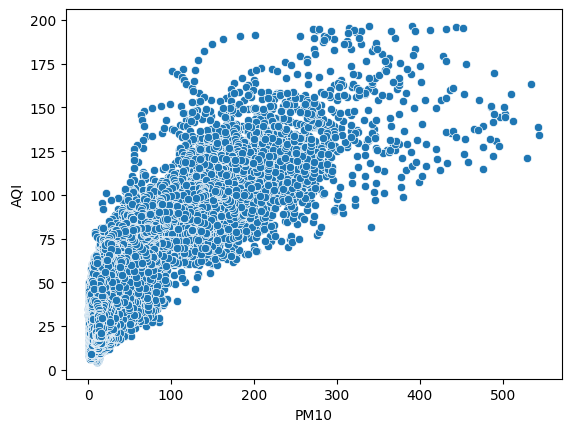

In [13]:
sns.scatterplot(x='PM10',y='AQI',data=df)

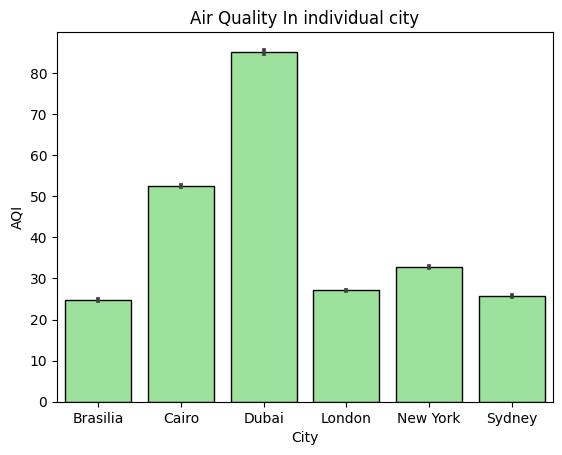

In [14]:
df=pd.DataFrame(df)
sns.barplot(x='City',y='AQI',data=df,edgecolor='k',color='lightgreen')
plt.title("Air Quality In individual city")
plt.show()

In [15]:
x=df[['CO','NO2','SO2','O3','PM2.5','PM10']]
x.shape

(52704, 6)

In [16]:
y=df['AQI']
y.shape

(52704,)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(42163, 6)
(10541, 6)
(42163,)
(10541,)


In [18]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred=lr_model.predict(x_test)
y_pred

array([29.98746215, 38.87392142, 42.12681788, ..., 38.28064401,
       20.49023819, 26.76770548])

In [20]:
mse=mean_squared_error(y_pred,y_test)
print(mse)

126.46934975953765


In [21]:
r2=r2_score(y_pred,y_test)
print(r2*100)

76.98552966201603


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


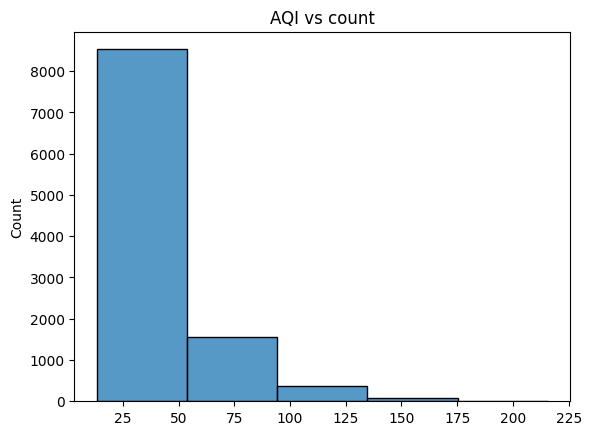

In [22]:
sns.histplot(y_pred,bins=5)
plt.title("AQI vs count")
plt.show()

In [23]:
new_data=[[824.2,23.4,3.2,34.0,16.2,13.2]]

In [24]:
new_pred=lr_model.predict(new_data)
print(f"Air quality prediction {new_pred[0]}")

Air quality prediction 27.234517779337533


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
